In [1]:
import pandas as pd
import numpy as np


# Import Dataset

In [2]:
dataset_xls_1 = pd.read_excel('./Dataset/sales-(2020).xlsx')
dataset_xls_2 = pd.read_excel('./Dataset/sales-(2021).xlsx')
dataset_xls_3 = pd.read_excel('./Dataset/sales-(2022).xlsx')
dataset_xls_4 = pd.read_excel('./Dataset/sales-(2023).xlsx')

# combine all dataset_xls into one dataframe
dataset = pd.concat([dataset_xls_1, dataset_xls_2,
                    dataset_xls_3, dataset_xls_4], ignore_index=True)
dataset.columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [3]:
dataset

,username,no-pesanan,tanggal-pesanan,nama-barang,jumlah,dibayar,payment-method
0,surya251196,201104NURT3,2020-05-03,"NIBRAS SARIMBIT LAIKA BLACK, NIBRAS SARIMBIT E...",2,230000,COD
1,captain.marline,201104DSB34,2020-05-03,"NIBRAS SARIMBIT LAIKA BLACK, NIBRAS NBC 20 GAM...",2,230000,COD
2,ridhayashinta,201104JHVJ45,2020-05-03,"NIBRAS SARIMBIT LAIKA BLACK, NIBRAS KOKO NK 101",2,230000,COD
3,nurulismawati103,201104VGRX4,2020-05-03,"NIBRAS KOKO NSK 89 DAN GAMIS NB A89, NIBRAS KO...",2,230000,COD
4,nabilahauraaa,201104XSAEF,2020-05-04,"NIBRAS KOKO NSK 89 DAN GAMIS NB A90, NIBRAS CO...",2,230000,Pay Later
5,anggrayni86,201104TGHJ5,2020-05-04,"NIBRAS KOKO NSK 89 DAN GAMIS NB A91, NIBRAS NB...",2,230000,COD
6,mannis24,201104ZRTGH,2020-05-04,"NIBRAS KOKO NSK 89 DAN GAMIS NB A92, NIBRAS KO...",2,230000,COD
7,nenkjibar10,201104GBBM,2020-05-04,"NIBRAS NBC 20 GAMIS PUTIH DAN HITAM POLOS, NIB...",2,230000,COD
8,nurzarasastafiana,201104LOIN6,2020-05-04,"NIBRAS SARIMBIT DAANIA BURGUNDY COUPLE, NIBRAS...",2,230000,Pay Later
9,alvita2903,201104AQSE3,2020-05-06,"NIBRAS SARIMBIT DAANIA BURGUNDY COUPLE, NIBRAS...",2,230000,COD


# Preprocessing Data

In [4]:
import datetime as dt


## Tokenize nama barang

In [5]:
dataset['nama-barang'] = dataset['nama-barang'].str.split(', ')
dataset['nama-barang'] = dataset['nama-barang'].apply(
    lambda x: [item.strip() for item in x])


## Split nama-barang items

In [6]:
dataset_replicated = dataset.explode('nama-barang').reset_index(drop=True)
dataset_replicated['nama-barang'] = dataset_replicated['nama-barang'].str.lower()

dataset_replicated.info

<bound method DataFrame.info of                    username    no-pesanan tanggal-pesanan  \
0               surya251196   201104NURT3      2020-05-03   
1               surya251196   201104NURT3      2020-05-03   
2           captain.marline   201104DSB34      2020-05-03   
3           captain.marline   201104DSB34      2020-05-03   
4             ridhayashinta  201104JHVJ45      2020-05-03   
5             ridhayashinta  201104JHVJ45      2020-05-03   
6          nurulismawati103   201104VGRX4      2020-05-03   
7          nurulismawati103   201104VGRX4      2020-05-03   
8             nabilahauraaa   201104XSAEF      2020-05-04   
9             nabilahauraaa   201104XSAEF      2020-05-04   
10              anggrayni86   201104TGHJ5      2020-05-04   
11              anggrayni86   201104TGHJ5      2020-05-04   
12                 mannis24   201104ZRTGH      2020-05-04   
13                 mannis24   201104ZRTGH      2020-05-04   
14              nenkjibar10    201104GBBM      2020-0

In [7]:
print(dataset_replicated.info())
print(dataset_replicated.shape)
print(dataset_replicated.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   username         637 non-null    object        
 1   no-pesanan       637 non-null    object        
 2   tanggal-pesanan  637 non-null    datetime64[ns]
 3   nama-barang      637 non-null    object        
 4   jumlah           637 non-null    int64         
 5   dibayar          637 non-null    int64         
 6   payment-method   637 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 35.0+ KB
None
(637, 7)
username           0
no-pesanan         0
tanggal-pesanan    0
nama-barang        0
jumlah             0
dibayar            0
payment-method     0
dtype: int64


## RFM (Recency, Frequency, Monetary)

In [8]:
# Monetary
rfm_dataset_monetary = dataset_replicated.groupby('username')['dibayar'].sum()

In [9]:
rfm_dataset_monetary = pd.DataFrame(rfm_dataset_monetary)
rfm_dataset_monetary.columns = ['amount']
rfm_dataset_monetary


,amount
username,
009kamal,460000
2uv9jxkjgs,150000
5ckqbsnqf3,920000
_alhaq_,920000
_byduri87,920000
_s798xl57h,150000
_w1nda_,460000
_yuyuntjill,150000
a.zainullah25,460000


In [10]:
# Frequency
rfm_dataset_frequency = dataset_replicated.groupby('username')[
    'username'].count()

# change column name to frequency
rfm_dataset_frequency = pd.DataFrame(
    rfm_dataset_frequency)

rfm_dataset_frequency.columns = ['frequency']
rfm_dataset_frequency


,frequency
username,
009kamal,2
2uv9jxkjgs,1
5ckqbsnqf3,4
_alhaq_,4
_byduri87,4
_s798xl57h,1
_w1nda_,2
_yuyuntjill,1
a.zainullah25,2


In [11]:
# Recency
dataset_replicated['tanggal-pesanan'] = pd.to_datetime(
    dataset_replicated['tanggal-pesanan'], format='%d-%m-%Y %H:%M')

max_date = max(dataset_replicated['tanggal-pesanan'])
dataset_replicated['Diff'] = max_date - dataset_replicated['tanggal-pesanan']


In [12]:
rfm_dataset_recency = dataset_replicated.groupby('username')['Diff'].min()
rfm_dataset_recency.reset_index()
rfm_dataset_recency = pd.DataFrame(rfm_dataset_recency)
rfm_dataset_recency['Diff'] = rfm_dataset_recency['Diff'].dt.days
rfm_dataset_recency

,Diff
username,
009kamal,710
2uv9jxkjgs,355
5ckqbsnqf3,366
_alhaq_,7
_byduri87,365
_s798xl57h,1067
_w1nda_,716
_yuyuntjill,1068
a.zainullah25,1063


In [13]:
# Merge RFM 
rfm_final = pd.merge(rfm_dataset_recency, rfm_dataset_frequency, on='username', how='inner')
rfm_final = pd.merge(rfm_final, rfm_dataset_monetary, on='username', how='inner')

rfm_final['username'] = rfm_final.index
rfm_final = rfm_final.reset_index(drop=True)

cols = list(rfm_final.columns)
cols = [cols[-1]] + cols[:-1]
rfm_final = rfm_final[cols]


rfm_final.columns = ['Username', 'Amount', 'Frequency', 'Recency']
rfm_final

,Username,Amount,Frequency,Recency
0,009kamal,710,2,460000
1,2uv9jxkjgs,355,1,150000
2,5ckqbsnqf3,366,4,920000
3,_alhaq_,7,4,920000
4,_byduri87,365,4,920000
5,_s798xl57h,1067,1,150000
6,_w1nda_,716,2,460000
7,_yuyuntjill,1068,1,150000
8,a.zainullah25,1063,2,460000
9,aanewborn,1065,2,460000


## Outlier Filtering

In [14]:
Q1 = rfm_final.Amount.quantile(0.05)
Q3 = rfm_final.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm_final = rfm_final[(rfm_final.Amount >= (Q1 - 1.5*IQR))
                      & (rfm_final.Amount <= (Q3 + 1.5 * IQR))]


In [15]:
Q1 = rfm_final.Recency.quantile(0.05)
Q3 = rfm_final.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm_final = rfm_final[(
    rfm_final.Recency >= Q1 - 1.5*IQR) & (rfm_final.Recency <= Q3 + 1.5*IQR)]


In [16]:
Q1 = rfm_final.Frequency.quantile(0.05)
Q3 = rfm_final.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm_final = rfm_final[(
    rfm_final.Frequency >= Q1 - 1.5*IQR) & (rfm_final.Frequency <= Q3 + 1.5*IQR)]


In [17]:
print(rfm_final.shape)


(346, 4)


## Scaling - Min Max Scaler

In [18]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np

In [19]:
x = rfm_final[['Amount', 'Frequency', 'Recency']]
scaler = MinMaxScaler()
rfm_scaled = scaler.fit_transform(x)

In [20]:
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_scaled

,Amount,Frequency,Recency
0,0.661080,0.25,0.31
1,0.330540,0.00,0.00
2,0.340782,0.75,0.77
3,0.006518,0.75,0.77
4,0.339851,0.75,0.77
5,0.993482,0.00,0.00
6,0.666667,0.25,0.31
7,0.994413,0.00,0.00
8,0.989758,0.25,0.31
9,0.991620,0.25,0.31


# Model Creation

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [22]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=50)
kmeans.fit(rfm_scaled)
lbs = kmeans.labels_
print(lbs)
silhouette_avg = silhouette_score(rfm_scaled, lbs)
print(f"Silhouette Score: {silhouette_avg}")

c:\Users\saifu\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\saifu\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[1 2 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 2 2 1 1 1 2 1 1 1 1 2 2 1 0 0 1 1
 1 0 1 1 1 1 1 2 1 1 1 1 2 0 1 1 1 1 2 1 2 1 1 2 1 2 1 2 2 1 2 1 2 1 1 1 2
 2 0 1 2 2 1 2 1 2 1 1 1 1 2 1 2 2 2 0 1 2 1 1 1 1 1 1 2 1 1 1 0 1 2 2 1 2
 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 0 1 1 2 1 1 1 1 2 1 2 2 2 2 1 0 1 1 2 1 2
 2 2 1 2 2 1 2 1 2 1 1 2 1 1 2 1 1 1 2 2 2 1 1 1 2 2 0 1 2 2 1 2 0 1 0 1 1
 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 0 1 2 2 1 1 1 1 1 1 1 2 2 1
 2 1 2 1 0 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 2 1 0 1 0 1 1 2 2 2 1 2
 1 0 0 2 1 0 1 2 2 2 1 2 1 1 1 1 0 2 1 1 2 2 1 2 0 2 2 1 2 2 1 2 1 1 1 1 1
 0 1 0 0 2 1 1 2 1 0 1 1 1 1 1 0 2 2 1 2 0 1 2 2 1 2 1 1 2 2 2 2 1 1 1 1 2
 2 1 2 2 1 1 1 1 1 2 1 2 1]
Silhouette Score: 0.5641087778885784


# Model Analysis

## WSS (Within-Cluster Sum of Square) with Elbow Curve

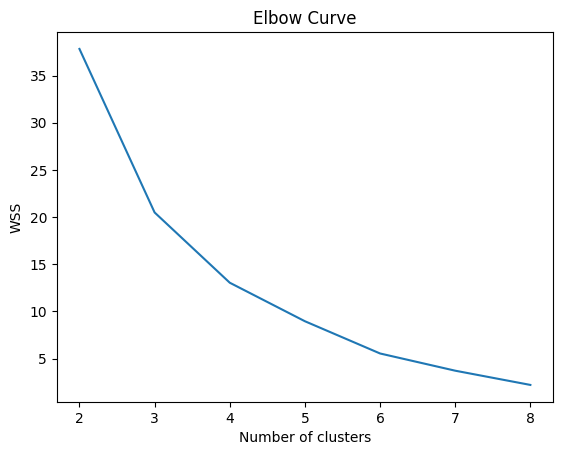

In [23]:
wss = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=50)
    kmeans.fit(rfm_scaled)
    labels = kmeans.labels_
    wss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range_n_clusters, wss)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()


## Silhouette Score Analysis

Score shilhouette antara -1 sampai 1. Semakin tinggi nilainya, semakin baik modelnya.

- Semakin dekat dengan 1, artinya data point di dalam cluster semakin dekat dengan data point di cluster lain.
- Semakin dekat dengan -1, artinya data point tidak sama dengan data point di cluster yang sama

In [24]:
# silhouette score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, max_iter=50)
    kmeans.fit(rfm_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(
        num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.4976614675348625
For n_clusters=3, the silhouette score is 0.5641087778885784
For n_clusters=4, the silhouette score is 0.6068878719681005
For n_clusters=5, the silhouette score is 0.6379351499392372
For n_clusters=6, the silhouette score is 0.7544484367480596
For n_clusters=7, the silhouette score is 0.8156447925721442
For n_clusters=8, the silhouette score is 0.878996472347028


# Model Result

In [25]:
rfm_final['Cluster_Id'] = lbs
rfm_final

,Username,Amount,Frequency,Recency,Cluster_Id
0,009kamal,710,2,460000,1
1,2uv9jxkjgs,355,1,150000,2
2,5ckqbsnqf3,366,4,920000,0
3,_alhaq_,7,4,920000,0
4,_byduri87,365,4,920000,0
5,_s798xl57h,1067,1,150000,1
6,_w1nda_,716,2,460000,1
7,_yuyuntjill,1068,1,150000,1
8,a.zainullah25,1063,2,460000,1
9,aanewborn,1065,2,460000,1


# Plotting

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns

In [27]:
rfm_final

,Username,Amount,Frequency,Recency,Cluster_Id
0,009kamal,710,2,460000,1
1,2uv9jxkjgs,355,1,150000,2
2,5ckqbsnqf3,366,4,920000,0
3,_alhaq_,7,4,920000,0
4,_byduri87,365,4,920000,0
5,_s798xl57h,1067,1,150000,1
6,_w1nda_,716,2,460000,1
7,_yuyuntjill,1068,1,150000,1
8,a.zainullah25,1063,2,460000,1
9,aanewborn,1065,2,460000,1


## Box Plot

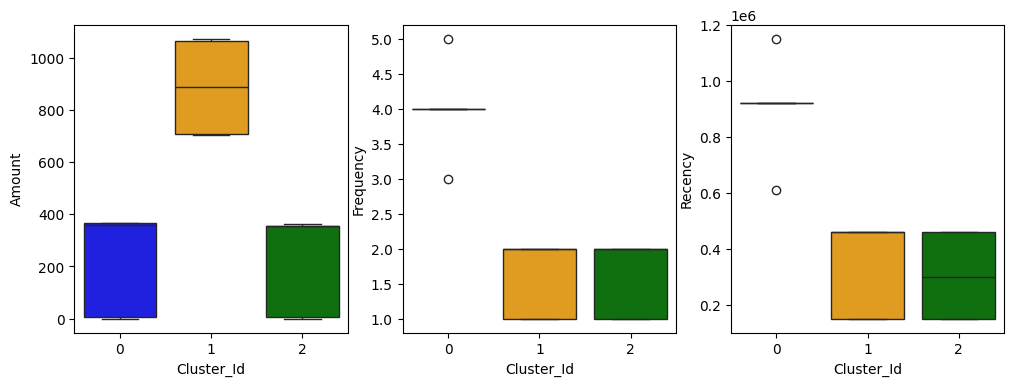

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mendefinisikan warna untuk setiap klaster
colors = ["blue", "orange", "green"]

# Membuat subplot dan boxplot
plt.figure(figsize=(12, 4))

# Boxplot untuk 'Amount'
plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster_Id', y='Amount', hue='Cluster_Id', data=rfm_final, palette=colors, legend=False)

# Boxplot untuk 'Frequency'
plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster_Id', y='Frequency', hue='Cluster_Id', data=rfm_final, palette=colors, legend=False)

# Boxplot untuk 'Recency'
plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster_Id', y='Recency', hue='Cluster_Id', data=rfm_final, palette=colors, legend=False)

plt.show()


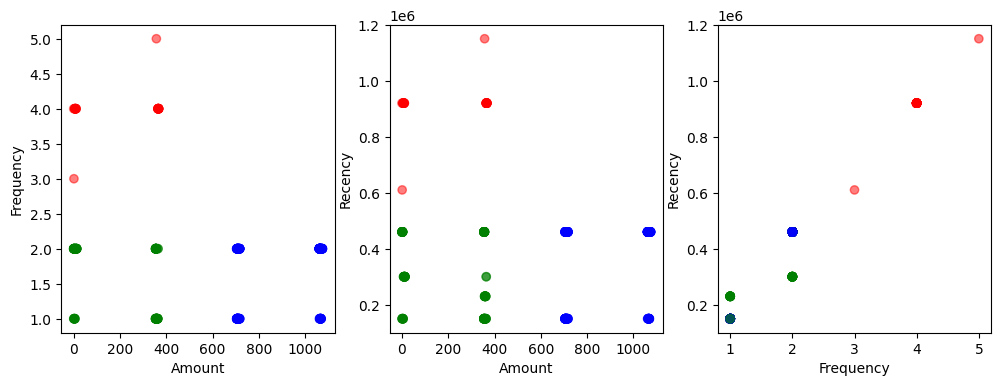

In [29]:
colors = ['red', 'blue', 'green']
rfm_final_plot = rfm_final.copy()
rfm_final_plot['Color'] = rfm_final_plot['Cluster_Id'].map(lambda p: colors[p])

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
# create scatter plot for amount and frequency based on cluster id and color the data points
plt.scatter(rfm_final_plot['Amount'], rfm_final_plot['Frequency'],
            c=rfm_final_plot['Color'], alpha=0.5)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.subplot(1, 3, 2)
# create scatter plot for amount and recency based on cluster id and color the data points
plt.scatter(rfm_final_plot['Amount'], rfm_final_plot['Recency'],
            c=rfm_final_plot['Color'], alpha=0.5)
plt.xlabel('Amount')
plt.ylabel('Recency')
plt.subplot(1, 3, 3)
# create scatter plot for frequency and recency based on cluster id and color the data points
plt.scatter(rfm_final_plot['Frequency'], rfm_final_plot['Recency'],
            c=rfm_final_plot['Color'], alpha=0.5)
plt.xlabel('Frequency')
plt.ylabel('Recency')
plt.show()



